Нужно проверить распределение величины угла между проекцией направления каскада на плоскость XoY и осью oX

Нужно проверить гипотезу, что если в процессе моделирования хиты происходят цепочками event-ов каскадов, т.е.
если в моделировании текущего каскада были срабатывания детекторов, то шанс активации детекторов в обработке
следующего возрастает

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(pd.__version__, np.__version__)

1.3.3 1.21.2


In [2]:
def load_data_from_csv(filename : str):
    # loading and returning ndarray type
    import pandas as pd
    data_frame = pd.read_csv(filename, index_col=0)
    return data_frame.to_numpy()

import os
default_csv_data_folder="../csv_data"
csvs_filenames = os.listdir(default_csv_data_folder)
for csv_filename in csvs_filenames:
    cc = 0
    relative_path = default_csv_data_folder + "/" + csv_filename
    if ("dataset" in csv_filename):
        current_array = load_data_from_csv(relative_path)
        for sample in current_array:
            if (sample[5] > 0):
                cc += 1
        print(relative_path, cc)

In [3]:
def load_data_from_csv(filename : str):
    # loading and returning ndarray type
    import pandas as pd
    data_frame = pd.read_csv(filename, index_col=0)
    return data_frame.to_numpy()


def build_histogram(data : list, title : str = "histogram", n_bins : int = 10, param_range : tuple = (False, False)):
    import matplotlib.pyplot as plt

    # do not know how to fo same more reliable, sorry
    used_range = ()
    first, second = param_range
    if (first == second == False):
        used_range = (data.min(), data.max())
    else:
        used_range = param_range

    plt.hist(data, bins=n_bins, range=used_range)
    plt.title(title)
    plt.show()


def load_multiple_csvs(sample_data : list, default_csv_data_folder : str = "./csv_data"):
    '''
        returns nothing!\n
        fill input array with data
    '''
    import os
    csvs_filenames = os.listdir(default_csv_data_folder)
    
    numpy_arrays = []
    for csv_filename in csvs_filenames:
        relative_path = default_csv_data_folder + "/" + csv_filename
        if ("dataset" in csv_filename):
            current_array = load_data_from_csv(relative_path)
            numpy_arrays.append(current_array)

    sample_data.append(np.concatenate(numpy_arrays))

In [7]:
sample_data = []
load_multiple_csvs(sample_data, default_csv_data_folder="../csv_data/analyze_data_4")
sample_data = sample_data[0]

print(sample_data[1000:1002])

[[ 6.26874695e+01  1.29763049e+03  2.19614924e+00  1.65030846e+00
              nan             nan  1.36000000e+02 -4.15873230e-01
  -5.72675645e-01 -7.06464469e-01  9.90773865e+02 -1.16737488e+03
   4.56303925e+02  1.00000000e+00  0.00000000e+00]
 [ 7.77671814e+01  1.29768031e+03  2.19614924e+00  1.65033937e+00
              nan             nan  1.37000000e+02 -4.15873230e-01
  -5.72675645e-01 -7.06464469e-01  9.90773865e+02 -1.16737488e+03
   4.56303925e+02  1.00000000e+00  0.00000000e+00]]


In [8]:
sample_data_swaped = sample_data.swapaxes(0, 1)

In [10]:
#data_cols_labels = ["z", "rho", "theta", #0 1 2
#                    "phi", "activation_time", "probs_mult", # 3 4 5
#                    "targer_det", "x_dir", "y_dir", "z_dir", "x_loc", "y_loc", "z_loc", "event_n", "is_event_hit"] # 6 7 8 9 10 11 12 13 14

event_num_info = sample_data_swaped[13]
event_hit_info = sample_data_swaped[14]

In [14]:
hit_cascade_info = []

prev_num = -1
for i in range(len(event_num_info)):
    if (event_num_info[i] != prev_num):
        hit_cascade_info.append((event_num_info[i], event_hit_info[i]))
    prev_num = event_num_info[i]

print(hit_cascade_info[:5])
print(len(hit_cascade_info))

[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0)]
600


In [15]:
hit_cascades_in_row = []

curr_len = 0
for num, is_hit in hit_cascade_info:
    if (is_hit == 1):
        curr_len += 1
    
    if (curr_len != 0 and is_hit == 0):
        hit_cascades_in_row.append(curr_len)
        curr_len = 0

print(hit_cascades_in_row)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]


In [19]:
from get_dataset_values import get_phi_det_origin, get_theta_det_origin, get_rho_det_origin

sample_x_dir = sample_data_swaped[7]
sample_y_dir = sample_data_swaped[8]
det_ids = sample_data_swaped[6]

print(len(sample_x_dir))
print(sample_x_dir[1000:1005])
print(sample_y_dir[1000:1005])
print(det_ids[1000:1005])

520496
[-0.41587323 -0.41587323 -0.41587323 -0.41587323 -0.41587323]
[-0.57267565 -0.57267565 -0.57267565 -0.57267565 -0.57267565]
[136. 137. 138. 139. 140.]


In [18]:
def get_det_coords(detectors_coords_list : list):
    csv_data_default_folder = "./"
    csv_default_filename = "../assist_data/detector_coords.csv"

    full_relative_name = csv_data_default_folder + "/" + csv_default_filename
    csv_raw_data = pd.read_csv(full_relative_name, index_col=0)
    for row in csv_raw_data.iterrows():
        # `uid` is equal list idxs, dont need to add same info
        current_det = {"x": row[1][7], "y": row[1][8], "z": row[1][9]}
        detectors_coords_list.append(current_det)

det_coords = []
get_det_coords(det_coords)
print(*det_coords[432].values())

-270.50860595703125 -420.2135925292969 98.30014038085938


In [22]:
angle_values = []
prev_dir_value = None

for x_dir, y_dir, det_id in zip(sample_x_dir, sample_y_dir, det_ids):
    if (prev_dir_value != x_dir):
        angle_values.append((get_phi_det_origin(x_dir, y_dir) / 3.14) * 360)
        prev_dir_value = x_dir

print(len(angle_values))
print(angle_values[100:110])

600
[-347.83053444007106, 267.2861227865914, 199.13726824056792, 176.4091833895991, 329.3195584076826, -241.32804749331189, -182.41982761512057, 61.721045869881976, -259.997225328905, -161.86134968967252]


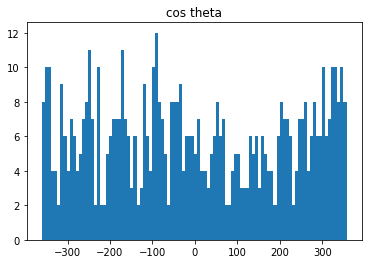

In [24]:
build_histogram(np.array(angle_values), n_bins=100, title="cos theta")